In [1]:
import csv
import numpy as np
import sys
import os
from matplotlib import pyplot as plt
from skimage import io

# Parsing labels

In [2]:
def load_label(fname):
    label = []
    with open(fname) as f:
        reader = csv.reader(f)
        next(reader)
        for row in reader:
            label.append(row)
    return label

In [3]:
label = load_label("./data/train.csv")
import pandas as pd
label = pd.DataFrame(label)
num_classes = len(set(label[1]))

# Label's frequency :

It is obvious that the classes aren't balanced.

In [23]:
table = pd.crosstab(index = label[1], columns = "count")


# Sampling image

In [5]:
def sample_img():
    index = np.random.choice(range(len(label)))
    img = io.imread("./data/train/{}".format(label[0][index]))
    io.imshow(img)
    print("Class : {}".format(label[1][index]))

Class : 83


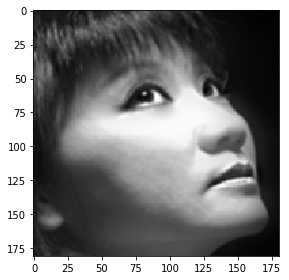

In [6]:
sample_img()

In [31]:
less_than_3 = table["count"] < 3
print(table.columns)
np.asarray((table[less_than_3].index)).astype(int)

Index(['count'], dtype='object', name='col_0')


array([  0, 109,  11, 111, 114, 116, 117,  12, 120,  13, 130, 134, 137,
       139,  14, 140, 142, 143, 145, 152, 165,  17, 170, 171, 177,  18,
       181, 183, 190, 193, 198, 200, 203, 205, 206, 213, 214, 215,  22,
       224, 228,  23, 230, 239, 240, 246, 249,  25, 252, 270, 271, 277,
       284,  29, 295,   3,  30, 303, 308, 309,  31, 312, 313, 317, 318,
       325, 329,  33, 330, 336, 337, 339, 340, 344, 348, 350, 351, 355,
        36, 362, 367,  37, 370, 371,  38,  39, 395, 397,  40, 403, 407,
        41, 410, 413, 415, 417, 421, 422, 427, 429,  43, 432, 441, 442,
       447, 450, 452, 455, 458, 461, 462, 467, 470, 477, 478, 479, 486,
       488,  49, 499,  50,  51, 520, 521, 524, 527,  53, 535, 537, 543,
       544, 546, 550, 551, 556, 559, 560, 568, 569, 577, 579, 580, 591,
       598, 599, 601, 603, 605, 613, 616,  62, 624, 633, 634, 635,  64,
       640, 644,  65, 653, 655, 658, 660, 663,  67, 676, 677, 678, 679,
        68, 680,  69,   7, 700, 704, 710, 712, 713,  72, 732, 73